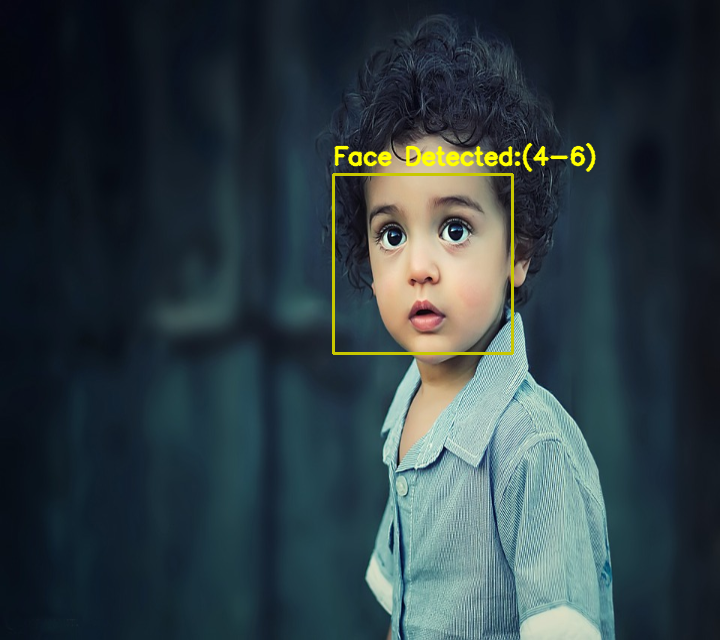

In [19]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

AGE_MODEL = './age_deploy.prototxt'  # 가중치 모델 파일
AGE_PROTO = './age_net.caffemodel'  # 환경 파일

age_net = cv2.dnn.readNetFromCaffe(AGE_MODEL, AGE_PROTO) # Dnn 모델

ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
        '(25-32)', '(38-43)', '(48-53)', '(60-100)'] # 나이 그룹
model_mean = (78.4263377603, 87.7689143744, 114.895847746)


img = cv2.imread('kid1.jpg')
img = cv2.resize(img, (720, 640))
frame = img.copy()

fH = img.shape[0]
fW = img.shape[1]

Boxes = []
msg = 'Face Detected' # 표시 글

# ------------- dlib 얼굴 인식 ---------#
face_detector = dlib.get_frontal_face_detector()
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_detector(img_gray)

if not faces:
    msg = 'No face detected'
    cv2.putText(img, f'{msg}', (40, 40),cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2)
    cv2_imshow(img)
    cv2.waitKey(0)

else:
    for face in faces:
        x = face.left()
        y = face.top()
        x2 = face.right()
        y2 = face.bottom()

        # 얼굴 표시
        box = [x, y, x2, y2]
        Boxes.append(box)
        cv2.rectangle(frame, (x, y), (x2, y2),
                    (00, 200, 200), 2)

    for box in Boxes:
        face = frame[box[1]:box[3], box[0]:box[2]]

        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), model_mean, swapRB=False)

        # -------연령 예측---------#
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = ageList[age_preds[0].argmax()]

        cv2.putText(frame, f'{msg}:{age}', (box[0],
                                            box[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                    (0, 255, 255), 2, cv2.LINE_AA)

        cv2_imshow(frame)
        cv2.waitKey(0)


# 필요 라이브러리 dlib -> 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++로 개발된 고성능의 라이브러리
# dlib -> 이용 시 아나콘다(가상환경 실행) 필요
# 정면이 아님 인식율 ↓